# Week 12 Homework

**1.	In 250-500 words, write a thorough discussion of when to use ML and when not to.**

## Machine Learning – Big Picture

Machine learning is the application of data or computer science methods on data.   Machine learning is best used to find data insights, predictions, and grouping or patterns in the data.   The two major types of machine learning are supervised and unsupervised.

### Supervised Machine Learning
* Has training and validation data to make sure algorithm is on the right path.
* Best for data insights and predicting future outcomes.
* Examples:
    * A ML algorithm could be used to predict target variables such as a model to predict needed insulin levels based on time of day, normal patterns, and current blood sugar levels for a particular patient.
    * Prediction of transportation or manufactured goods demand.
    * Find the shortest path not only in real time, but predict future.  Model could also be used to understand the impact of other variables on the shorted path type problems.  
    * Identify variables that are related to a particular outcome – i.e. fraud detection in financial transactions or what health variables are related to certain health outcomes.



	
### Unsupervised Machine Learning
* Best used for understand data patterns or groupings.
	* A ML algorithm can be used for customer segmentation or finding ways to cluster data that are not immediately obvious.  
* Examples:
	* Anomaly detection – what data is out of a normal pattern and what can be learned from it
	* Recommendations for products or services based on segmentation.  By looking at customer segments with similar patterns, what can be recommended based on new customers with similar patterns.

### Other Consideratons

Machine learning algorithms can be implemented in both testing or prototype environments and large-scale enterprise applications.

Machine learning is not useful when not enough data or the right kind of data exists to answer a business question or meet business needs.  A cost benefit analysis may also reveal the gains from machine learning do not outweigh the costs.  Machine learning models may also fail from large error rates, low precision (missed classification/false positives), and low recall (observations not captured).


**2.  Perform pre-processing on the Lending Club dataset from class. Clearly use markdown to indicate each pre-processing step you are using. Note: you should use at least three different techniques.**

In [55]:
# https://www.openintro.org/data/index.php?data=loans_full_schema
# Handy imports

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import os
#import plotly.express as px
#from scipy import signal

loans_df = pd.read_csv('loans_full_schema.csv')

In [56]:
pd.options.display.max_columns = None
loans_df.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,installment,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,0,38.0,2001,6,28,10,70795,38767,0,0,38.0,0,1250,2,5,5.0,10,0.0,0,2,11100,14,8,6,1,92.9,0,0,moving,individual,28000,60,14.07,652.53,C,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,0,NaN,1996,1,30,14,28800,4321,0,1,NaN,0,0,0,11,8.0,14,0.0,0,3,16500,24,14,4,0,100.0,0,1,debt_consolidation,individual,5000,36,12.61,167.54,C,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,0,28.0,2006,4,31,10,24193,16000,0,0,28.0,0,432,1,13,7.0,10,0.0,0,3,4300,14,8,6,0,93.5,0,0,other,individual,2000,36,17.09,71.40,D,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,0,NaN,2007,0,4,4,25400,4997,0,1,NaN,0,0,1,1,15.0,4,0.0,0,2,19400,3,3,2,0,100.0,1,0,debt_consolidation,individual,21600,36,6.72,664.19,A,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,0,NaN,2008,7,22,16,69839,52722,0,0,NaN,0,0,1,6,4.0,16,0.0,0,10,32700,20,15,13,0,100.0,0,0,credit_card,joint,23000,36,14.07,786.87,C,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


***Pre-processing homeownership column with one hot encoding***

In [57]:
# get info on columns
loans_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9167 non-null   object 
 1   emp_length                        9183 non-null   float64
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  float64
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    9976 non-null   float64
 7   annual_income_joint               1495 non-null   float64
 8   verification_income_joint         1455 non-null   object 
 9   debt_to_income_joint              1495 non-null   float64
 10  delinq_2y                         10000 non-null  int64  
 11  months_since_last_delinq          4342 non-null   float64
 12  earli

In [58]:
# what are the values in homeownership
loans_df['homeownership'].value_counts()

MORTGAGE    4789
RENT        3858
OWN         1353
Name: homeownership, dtype: int64

In [59]:
# one hot encoding with get_dummies for homeownership column
# returns a new dataframe
loans_ownership_df = pd.get_dummies(loans_df['homeownership'])
loans_ownership_df.head()

,MORTGAGE,OWN,RENT
0,1,0,0
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [60]:
# merge new encoded dataframe with loans_df
loans_df = loans_df.merge(loans_ownership_df, how = 'left', left_index=True, right_index=True)
loans_df.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,installment,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees,MORTGAGE,OWN,RENT
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,0,38.0,2001,6,28,10,70795,38767,0,0,38.0,0,1250,2,5,5.0,10,0.0,0,2,11100,14,8,6,1,92.9,0,0,moving,individual,28000,60,14.07,652.53,C,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0,1,0,0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,0,NaN,1996,1,30,14,28800,4321,0,1,NaN,0,0,0,11,8.0,14,0.0,0,3,16500,24,14,4,0,100.0,0,1,debt_consolidation,individual,5000,36,12.61,167.54,C,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0,0,0,1
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,0,28.0,2006,4,31,10,24193,16000,0,0,28.0,0,432,1,13,7.0,10,0.0,0,3,4300,14,8,6,0,93.5,0,0,other,individual,2000,36,17.09,71.40,D,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0,0,0,1
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,0,NaN,2007,0,4,4,25400,4997,0,1,NaN,0,0,1,1,15.0,4,0.0,0,2,19400,3,3,2,0,100.0,1,0,debt_consolidation,individual,21600,36,6.72,664.19,A,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0,0,0,1
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,0,NaN,2008,7,22,16,69839,52722,0,0,NaN,0,0,1,6,4.0,16,0.0,0,10,32700,20,15,13,0,100.0,0,0,credit_card,joint,23000,36,14.07,786.87,C,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0,0,0,1


***Preprocessing verified_income with nominal values***

In [63]:
# looks at the verified_income column values
loans_df['verified_income'].value_counts()

Source Verified    4116
Not Verified       3594
Verified           2290
Name: verified_income, dtype: int64

In [64]:
#nominal values
from sklearn.preprocessing import LabelEncoder
class_labels = LabelEncoder()
loans_df['verified_income'] = class_labels.fit_transform(loans_df['verified_income'].values)
loans_df.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,installment,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees,MORTGAGE,OWN,RENT
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,2,18.01,NaN,NaN,NaN,0,38.0,2001,6,28,10,70795,38767,0,0,38.0,0,1250,2,5,5.0,10,0.0,0,2,11100,14,8,6,1,92.9,0,0,moving,individual,28000,60,14.07,652.53,C,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0,1,0,0
1,warehouse office clerk,10.0,HI,RENT,40000.0,0,5.04,NaN,NaN,NaN,0,NaN,1996,1,30,14,28800,4321,0,1,NaN,0,0,0,11,8.0,14,0.0,0,3,16500,24,14,4,0,100.0,0,1,debt_consolidation,individual,5000,36,12.61,167.54,C,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0,0,0,1
2,assembly,3.0,WI,RENT,40000.0,1,21.15,NaN,NaN,NaN,0,28.0,2006,4,31,10,24193,16000,0,0,28.0,0,432,1,13,7.0,10,0.0,0,3,4300,14,8,6,0,93.5,0,0,other,individual,2000,36,17.09,71.40,D,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0,0,0,1
3,customer service,1.0,PA,RENT,30000.0,0,10.16,NaN,NaN,NaN,0,NaN,2007,0,4,4,25400,4997,0,1,NaN,0,0,1,1,15.0,4,0.0,0,2,19400,3,3,2,0,100.0,1,0,debt_consolidation,individual,21600,36,6.72,664.19,A,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0,0,0,1
4,security supervisor,10.0,CA,RENT,35000.0,2,57.96,57000.0,Verified,37.66,0,NaN,2008,7,22,16,69839,52722,0,0,NaN,0,0,1,6,4.0,16,0.0,0,10,32700,20,15,13,0,100.0,0,0,credit_card,joint,23000,36,14.07,786.87,C,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0,0,0,1


***Preprocessing grade column into a numerical value***

In [68]:
# look at column values
loans_df['grade'].value_counts()

B    3037
C    2653
A    2459
D    1446
E     335
F      58
G      12
Name: grade, dtype: int64

In [70]:
# create map of column values to numbers
loan_grade_map = {'A': 1, 'B':2, 'C':3, 'D':4, 'E': 5, 'F': 6, 'G':7}

In [71]:
# apply map
loans_df['grade']= loans_df['grade'].map(loan_grade_map)
loans_df.head(10)

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,installment,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees,MORTGAGE,OWN,RENT
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,2,18.01,NaN,NaN,NaN,0,38.0,2001,6,28,10,70795,38767,0,0,38.0,0,1250,2,5,5.0,10,0.0,0,2,11100,14,8,6,1,92.9,0,0,moving,individual,28000,60,14.07,652.53,3,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0,1,0,0
1,warehouse office clerk,10.0,HI,RENT,40000.0,0,5.04,NaN,NaN,NaN,0,NaN,1996,1,30,14,28800,4321,0,1,NaN,0,0,0,11,8.0,14,0.0,0,3,16500,24,14,4,0,100.0,0,1,debt_consolidation,individual,5000,36,12.61,167.54,3,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0,0,0,1
2,assembly,3.0,WI,RENT,40000.0,1,21.15,NaN,NaN,NaN,0,28.0,2006,4,31,10,24193,16000,0,0,28.0,0,432,1,13,7.0,10,0.0,0,3,4300,14,8,6,0,93.5,0,0,other,individual,2000,36,17.09,71.40,4,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0,0,0,1
3,customer service,1.0,PA,RENT,30000.0,0,10.16,NaN,NaN,NaN,0,NaN,2007,0,4,4,25400,4997,0,1,NaN,0,0,1,1,15.0,4,0.0,0,2,19400,3,3,2,0,100.0,1,0,debt_consolidation,individual,21600,36,6.72,664.19,1,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0,0,0,1
4,security supervisor,10.0,CA,RENT,35000.0,2,57.96,57000.0,Verified,37.66,0,NaN,2008,7,22,16,69839,52722,0,0,NaN,0,0,1,6,4.0,16,0.0,0,10,32700,20,15,13,0,100.0,0,0,credit_card,joint,23000,36,14.07,786.87,3,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0,0,0,1
5,NaN,NaN,KY,OWN,34000.0,0,6.46,NaN,NaN,NaN,1,3.0,1990,6,32,12,42100,3898,0,0,60.0,0,0,0,2,5.0,12,0.0,0,1,27200,27,12,5,3,78.1,0,0,other,individual,5000,36,6.72,153.75,1,A3,Jan-2018,Current,whole,Cash,4256.71,873.13,743.29,129.84,0.0,0,1,0
6,hr,10.0,MI,MORTGAGE,35000.0,1,23.66,155000.0,Not Verified,13.12,0,NaN,2004,1,12,10,291852,18916,0,0,NaN,0,0,2,1,9.0,10,0.0,0,3,9100,8,7,6,2,100.0,0,0,credit_card,joint,24000,60,13.59,553.35,3,C2,Jan-2018,Current,whole,Cash,22560.00,2730.51,1440.00,1290.51,0.0,1,0,0
7,police,10.0,AZ,MORTGAGE,110000.0,1,16.19,NaN,NaN,NaN,1,19.0,2005,1,30,15,342336,60805,0,0,71.0,0,0,2,4,7.0,15,NaN,0,5,22250,16,12,10,7,93.0,0,0,debt_consolidation,individual,20000,60,11.99,444.79,2,B5,Jan-2018,Current,whole,Cash,19005.39,1765.84,994.61,771.23,0.0,1,0,0
8,parts,10.0,NV,MORTGAGE,65000.0,1,36.48,NaN,NaN,NaN,1,18.0,1998,3,35,21,283190,69561,0,0,18.0,0,0,6,10,4.0,21,0.0,0,11,36700,19,14,14,2,97.1,0,0,home_improvement,individual,20000,36,13.59,679.58,3,C2,Feb-2018,Current,whole,Cash,18156.66,2703.22,1843.34,859.88,0.0,1,0,0
9,4th person,3.0,IL,RENT,30000.0,0,18.91,NaN,NaN,NaN,0,NaN,2001,0,9,6,33114,17768,0,0,NaN,0,0,1,5,17.0,6,0.0,0,3,14700,7,5,3,0,100.0,0,0,credit_card,individual,6400,36,6.71,196.77,1,A3,Mar-2018,Current,fractional,Cash,6077.13,391.15,322.87,68.28,0.0,0,0,1


**3.	Create a correlation matrix with a heatmap for the features in the Lending Club dataset. Use markdown to write about your takeaways in under 250 words.**

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt


In [73]:
corrMatrix = loans_df.corr()
corr_df = pd.DataFrame(corrMatrix)
corr_df

,emp_length,annual_income,verified_income,debt_to_income,annual_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_amount,term,interest_rate,installment,grade,balance,paid_total,paid_principal,paid_interest,paid_late_fees,MORTGAGE,OWN,RENT
emp_length,1.000000,0.096469,0.016339,0.026157,0.071282,0.002103,0.008242,0.028790,-0.234408,0.003753,0.133472,0.067415,0.147594,0.019694,-0.015729,0.029997,0.077553,-0.011075,0.007772,-0.099357,0.027457,0.008758,0.067049,NaN,-0.011075,0.082499,0.095866,0.160848,0.115429,0.120279,0.209962,-0.000228,0.018134,0.030083,0.091255,0.056243,-0.029621,0.075981,-0.029687,0.086768,0.024246,0.018153,0.049517,0.001851,0.187324,0.042694,-0.220592
annual_income,0.096469,1.000000,0.016817,-0.180445,0.724664,-0.179790,0.052236,-0.040392,-0.156001,0.090119,0.210163,0.176788,0.516703,0.406370,-0.008330,0.025976,0.002810,0.001665,-0.000080,0.096542,0.094446,-0.050009,0.176957,NaN,0.001665,0.156078,0.328861,0.123963,0.112329,0.125455,0.243188,-0.010542,0.047439,-0.030568,0.324665,0.044843,-0.099584,0.315693,-0.096714,0.280170,0.162005,0.141893,0.174154,-0.005318,0.175323,-0.049504,-0.145138
verified_income,0.016339,0.016817,1.000000,0.101180,-0.049055,0.183796,0.011546,-0.026602,0.028718,0.083960,0.000592,0.017051,0.092137,0.066935,-0.006278,-0.000789,-0.031914,0.014955,0.000128,0.006325,0.081694,-0.084033,0.016414,NaN,0.014955,0.009796,-0.025001,-0.018126,0.003502,0.025149,0.048809,0.005699,-0.007026,0.010765,0.221168,0.127846,0.242954,0.222655,0.236064,0.205189,0.089805,0.059193,0.242589,0.023941,0.071630,-0.004861,-0.070093
debt_to_income,0.026157,-0.180445,0.101180,1.000000,-0.047284,0.348912,-0.027517,0.034637,-0.089700,0.025388,0.198647,0.217078,0.075174,0.238155,-0.011200,-0.004146,0.024982,0.007342,0.019175,0.200470,0.067724,0.023670,0.217000,NaN,0.007342,0.147478,0.065328,0.128341,0.136041,0.189845,0.033365,0.076636,-0.008522,0.006560,0.056329,0.046490,0.141653,0.066408,0.134950,0.065996,-0.003918,-0.020116,0.121160,-0.010110,0.071743,-0.008616,-0.067573
annual_income_joint,0.071282,0.724664,-0.049055,-0.047284,1.000000,-0.215504,0.046276,-0.049124,-0.175325,0.082176,0.240166,0.187639,0.493295,0.390667,-0.006926,-0.040135,-0.066533,NaN,0.012387,0.101302,0.055102,-0.029969,0.188730,NaN,NaN,0.145090,0.365135,0.170414,0.128796,0.112621,0.239525,-0.011635,-0.006605,-0.047933,0.330607,0.017057,-0.165327,0.303795,-0.167026,0.302291,0.108933,0.092761,0.120788,-0.002689,0.176324,-0.066948,-0.146885
debt_to_income_joint,0.002103,-0.179790,0.183796,0.348912,-0.215504,1.000000,-0.029220,0.065376,-0.091637,0.029515,0.187683,0.243765,-0.001495,0.316672,-0.000144,-0.031514,0.031667,NaN,0.002116,0.231431,0.101720,-0.037858,0.243484,NaN,NaN,0.178986,0.025449,0.119194,0.152397,0.232790,-0.078316,0.054834,0.017887,-0.057415,0.045363,0.037234,0.266417,0.079405,0.261185,0.055566,0.001389,-0.025166,0.177931,-0.028840,-0.003265,0.039617,-0.026642
delinq_2y,0.008242,0.052236,0.011546,-0.027517,0.046276,-0.029220,1.000000,-0.566551,-0.078109,0.003152,0.068040,0.013050,0.053373,0.001855,0.077680,-0.026574,-0.428286,0.026097,0.011577,0.005762,-0.062541,0.005850,0.012409,NaN,0.026097,-0.026848,-0.085512,0.060118,0.000471,-0.002676,0.063506,-0.444056,-0.005303,-0.044865,-0.033258,-0.025936,0.090456,-0.013724,0.090879,-0.031440,-0.004490,-0.006857,0.017165,-0.009404,0.034136,0.005881,-0.039164
months_since_last_delinq,0.

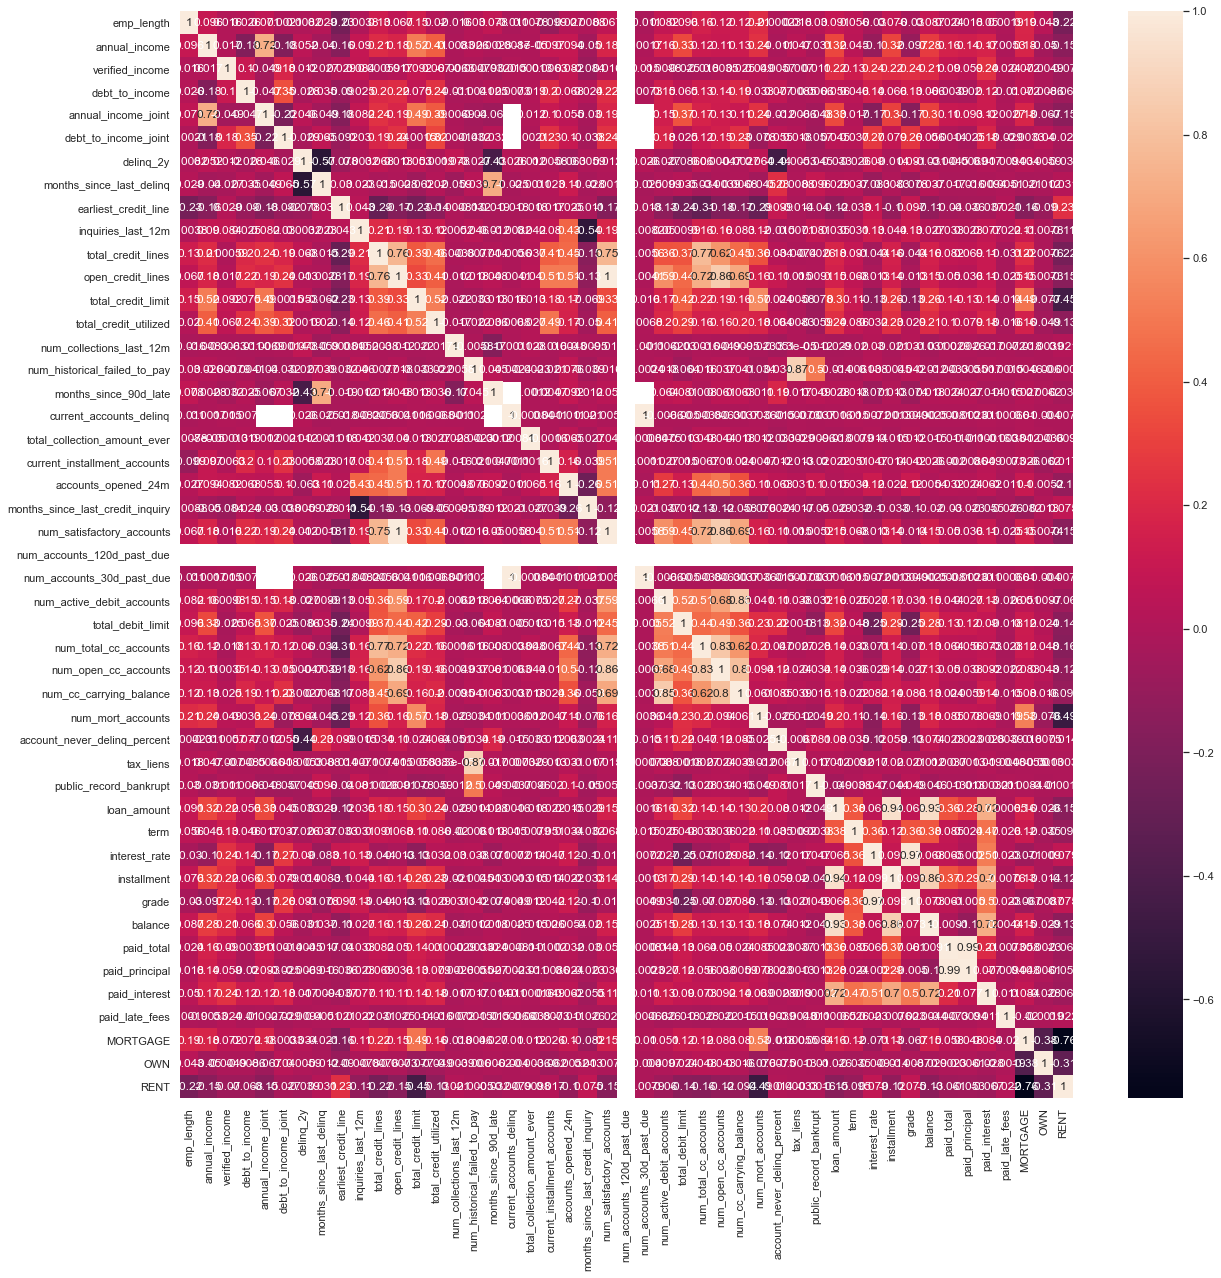

In [165]:
# create heat map
plt.figure(figsize=(20,20))
sns.heatmap(corrMatrix, annot=True)
plt.show()

**Discussion**

I think the heatmap might show some areas of correlation, but it's difficult to make sense of this.  The next step would be to find values of some reasonable correlation greater than .4 and less than -.4 and just heat map those columns.  There is some coding below, but I do not have time to finish it.  I found 68 column pairs that may have some correlation significance.

Some correlations seem somewhat obvious - tax liens and historical failed to pay are highly correlated.   Loan grade and interest rate are also correlated.   My guess is loans that are scored low (low grade) have higher interest rates because they are riskier to the lender.



In [88]:
corrAbs = corrMatrix.abs()

s = corrAbs.unstack()
so = s.sort_values(kind="quicksort")

useful = so[lambda c: .4 <= c]
useful = useful[lambda c: c < 1]

In [173]:
useful_df = pd.DataFrame(useful)
useful_df

,,0
total_credit_utilized,open_credit_lines,0.406047
open_credit_lines,total_credit_utilized,0.406047
num_satisfactory_accounts,total_credit_utilized,0.406134
total_credit_utilized,num_satisfactory_accounts,0.406134
annual_income,total_credit_utilized,0.406370
...,...,...
interest_rate,grade,0.969402
paid_principal,paid_total,0.991473
paid_total,paid_principal,0.991473
num_satisfactory_accounts,open_credit_lines,0.999481


**4.  Create a histogram showing the frequency of loan_amounts. Describe what you see. Pay special attention to bin sizes, and clearly describe how you chose your bin sizes.**

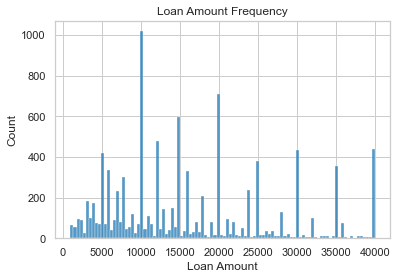

In [179]:
(len(loans_df['loan_amount']))
sns.histplot(loans_df['loan_amount'], bins = 100)
plt.xlabel('Loan Amount')
plt.title('Loan Amount Frequency');

Loans that more evenly divide by 5,000 seem be most frequent such as 5,000, 10,000, 15,000, 20,000, etc.   Most loans are 20,000 or less with the most frequent loan amount of 10,000.  Based on the loan amount, these loans are not for home purchases, but less expensive items or services.

I chose bin size based on the square root of the number of observations.  The square root of 10,000 is 100.   For comparison, I chose the default bin size below.  While the default is a good representation, it's a bit clearer to see the natural patterns of the loan amounts with a bin size of 100.  I also tried other extreme bin sizing and got less than satisfactory plots.

Auto/default bin size puts some automatic thought into appropriate bin sizes for data based on variance of data and number of data points.  It can be good, but maybe not always good enough.

<AxesSubplot:xlabel='loan_amount', ylabel='Count'>

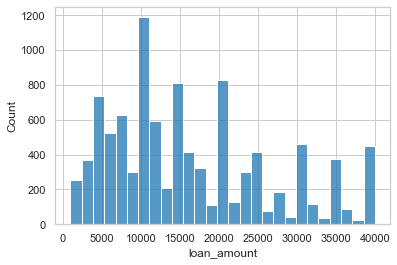

In [180]:
sns.histplot(loans_df['loan_amount'])

**5.	Create a new column called region that uses a lambda and shows which part of the US someone lives in, split up into Pacific, Plains, Midwest, Northeast, and South. Consider having your lambda call a function.** 

    a.	Is there a better way to do this than with a lambda? 

    b.	Either use two different lambdas or a lambda and a different technique and see which one is more performant. Explain your findings in the markdown.


In [103]:
regions = {'ME':'Northeast',
          'VT': 'Northeast', 
          'NH': 'Northeast',
          'CT': 'Northeast',
          'MA': 'Northeast',
          'RI': 'Northeast',
          'NY': 'Northeast',
          'NJ': 'Northeast',
          'PA': 'Northeast',
          'WV': 'Northeast',
          'VA': 'Northeast',
          'MD': 'Northeast',
          'DE': 'Northeast',
          'DC': 'Northeast',
           'MO': "Midwest",
           'IA': "Midwest",
           'MN': "Midwest",
           'WI': "Midwest",
           'IL': "Midwest",
           'KY': "Midwest",
           'IN': "Midwest",
           'MI': "Midwest",
           'OH': "Midwest",
           "WA": "Pacific",
           "ID": "Pacific",
           "OR": "Pacific",
           "CA": "Pacific",
           "NV": "Pacific",
           "UT": "Pacific",
           "AZ": "Pacific",
           "MT": "Plains",
           "ND": "Plains",
           "WY": "Plains",
           "SD": "Plains",
           "NE": "Plains",
           "CO": "Plains",
           "KS": "Plains",
           "NM": "Plains",
           "TX": "Plains",
           "OK": "Plains",
           "AR": "South",
           "TN": "South",
           "NC": "South",
           "LA": "South",
           "MS": "South",
           "AL": "South",
           "SC": "South",
           "GA": "South",
           "FL": "South",
          'PR': 'South',
          "AK": 'Pacific',
          "HI": 'Pacific'}

In [32]:
len(regions)

52

In [106]:
import time

In [108]:
print(time.perf_counter())
loans_df['region'] = loans_df['state'].apply(lambda k: regions[k])
print(time.perf_counter())

34894.730962119
34894.749516779


In [109]:
loans_df.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,installment,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees,MORTGAGE,OWN,RENT,region2,region
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,2,18.01,NaN,NaN,NaN,0,38.0,2001,6,28,10,70795,38767,0,0,38.0,0,1250,2,5,5.0,10,0.0,0,2,11100,14,8,6,1,92.9,0,0,moving,individual,28000,60,14.07,652.53,3,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0,1,0,0,Northeast,Northeast
1,warehouse office clerk,10.0,HI,RENT,40000.0,0,5.04,NaN,NaN,NaN,0,NaN,1996,1,30,14,28800,4321,0,1,NaN,0,0,0,11,8.0,14,0.0,0,3,16500,24,14,4,0,100.0,0,1,debt_consolidation,individual,5000,36,12.61,167.54,3,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0,0,0,1,Pacific,Pacific
2,assembly,3.0,WI,RENT,40000.0,1,21.15,NaN,NaN,NaN,0,28.0,2006,4,31,10,24193,16000,0,0,28.0,0,432,1,13,7.0,10,0.0,0,3,4300,14,8,6,0,93.5,0,0,other,individual,2000,36,17.09,71.40,4,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0,0,0,1,Midwest,Midwest
3,customer service,1.0,PA,RENT,30000.0,0,10.16,NaN,NaN,NaN,0,NaN,2007,0,4,4,25400,4997,0,1,NaN,0,0,1,1,15.0,4,0.0,0,2,19400,3,3,2,0,100.0,1,0,debt_consolidation,individual,21600,36,6.72,664.19,1,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0,0,0,1,Northeast,Northeast
4,security supervisor,10.0,CA,RENT,35000.0,2,57.96,57000.0,Verified,37.66,0,NaN,2008,7,22,16,69839,52722,0,0,NaN,0,0,1,6,4.0,16,0.0,0,10,32700,20,15,13,0,100.0,0,0,credit_card,joint,23000,36,14.07,786.87,3,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0,0,0,1,Pacific,Pacific


In [105]:
# apply map
print(time.perf_counter())

loans_df['region2']= loans_df['state'].map(regions)

print(time.perf_counter())

loans_df.head(10)

33279.801824724
33279.806875066


,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,installment,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees,MORTGAGE,OWN,RENT,region2
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,2,18.01,NaN,NaN,NaN,0,38.0,2001,6,28,10,70795,38767,0,0,38.0,0,1250,2,5,5.0,10,0.0,0,2,11100,14,8,6,1,92.9,0,0,moving,individual,28000,60,14.07,652.53,3,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0,1,0,0,Northeast
1,warehouse office clerk,10.0,HI,RENT,40000.0,0,5.04,NaN,NaN,NaN,0,NaN,1996,1,30,14,28800,4321,0,1,NaN,0,0,0,11,8.0,14,0.0,0,3,16500,24,14,4,0,100.0,0,1,debt_consolidation,individual,5000,36,12.61,167.54,3,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0,0,0,1,Pacific
2,assembly,3.0,WI,RENT,40000.0,1,21.15,NaN,NaN,NaN,0,28.0,2006,4,31,10,24193,16000,0,0,28.0,0,432,1,13,7.0,10,0.0,0,3,4300,14,8,6,0,93.5,0,0,other,individual,2000,36,17.09,71.40,4,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0,0,0,1,Midwest
3,customer service,1.0,PA,RENT,30000.0,0,10.16,NaN,NaN,NaN,0,NaN,2007,0,4,4,25400,4997,0,1,NaN,0,0,1,1,15.0,4,0.0,0,2,19400,3,3,2,0,100.0,1,0,debt_consolidation,individual,21600,36,6.72,664.19,1,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0,0,0,1,Northeast
4,security supervisor,10.0,CA,RENT,35000.0,2,57.96,57000.0,Verified,37.66,0,NaN,2008,7,22,16,69839,52722,0,0,NaN,0,0,1,6,4.0,16,0.0,0,10,32700,20,15,13,0,100.0,0,0,credit_card,joint,23000,36,14.07,786.87,3,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0,0,0,1,Pacific
5,NaN,NaN,KY,OWN,34000.0,0,6.46,NaN,NaN,NaN,1,3.0,1990,6,32,12,42100,3898,0,0,60.0,0,0,0,2,5.0,12,0.0,0,1,27200,27,12,5,3,78.1,0,0,other,individual,5000,36,6.72,153.75,1,A3,Jan-2018,Current,whole,Cash,4256.71,873.13,743.29,129.84,0.0,0,1,0,Midwest
6,hr,10.0,MI,MORTGAGE,35000.0,1,23.66,155000.0,Not Verified,13.12,0,NaN,2004,1,12,10,291852,18916,0,0,NaN,0,0,2,1,9.0,10,0.0,0,3,9100,8,7,6,2,100.0,0,0,credit_card,joint,24000,60,13.59,553.35,3,C2,Jan-2018,Current,whole,Cash,22560.00,2730.51,1440.00,1290.51,0.0,1,0,0,Midwest
7,police,10.0,AZ,MORTGAGE,110000.0,1,16.19,NaN,NaN,NaN,1,19.0,2005,1,30,15,342336,60805,0,0,71.0,0,0,2,4,7.0,15,NaN,0,5,22250,16,12,10,7,93.0,0,0,debt_consolidation,individual,20000,60,11.99,444.79,2,B5,Jan-2018,Current,whole,Cash,19005.39,1765.84,994.61,771.23,0.0,1,0,0,Pacific
8,parts,10.0,NV,MORTGAGE,65000.0,1,36.48,NaN,NaN,NaN,1,18.0,1998,3,35,21,283190,69561,0,0,18.0,0,0,6,10,4.0,21,0.0,0,11,36700,19,14,14,2,97.1,0,0,home_improvement,individual,20000,36,13.59,679.58,3,C2,Feb-2018,Current,whole,Cash,18156.66,2703.22,1843.34,859.88,0.0,1,0,0,Pacific
9,4th person,3.0,IL,RENT,30000.0,0,18.91,NaN,NaN,NaN,0,NaN,2001,0,9,6,33114,17768,0,0,NaN,0,0,1,5,17.0,6,0.0,0,3,14700,7,5,3,0,100.0,0,0,credit_card,individual,6400,36,6.71,196.77,1,A3,Mar-2018,Current,fractional,Cash,6077.13,391.15,322.87,68.28,0.0,0,0,1,Midwest


**6.	Create subplot histograms to show if loan_amounts differ by region. Summarize your findings.**

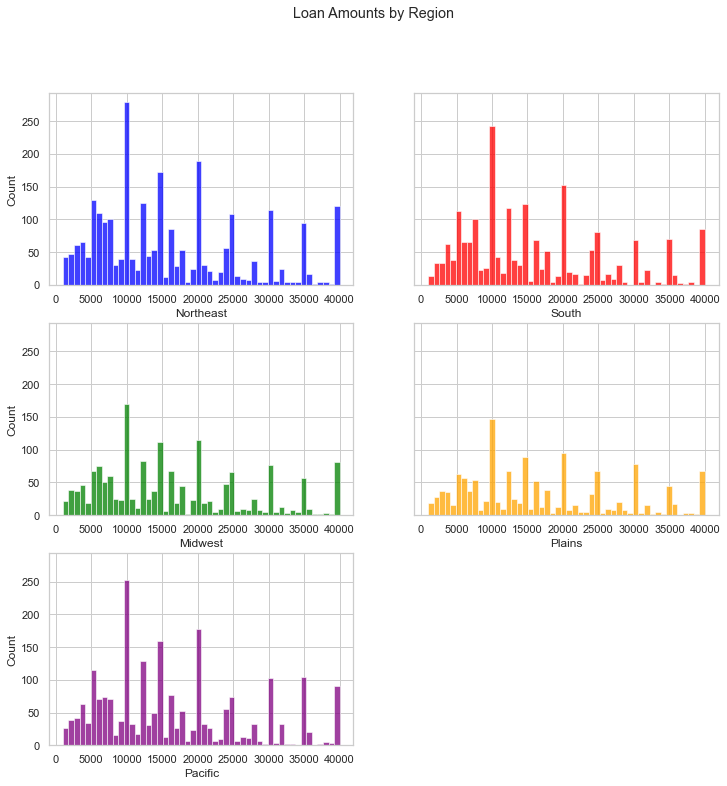

In [156]:
# Create histogram
sns.set_style("whitegrid")
sns.set_context("notebook")

fig, axes = plt.subplots(3, 2, figsize =(12,12), sharey=True)
axes[2][1].set_visible(False)
fig.suptitle('Loan Amount Frequencies by Region')

# make subplots

ax = sns.histplot(data = loans_df[loans_df['region'] == 'Northeast']['loan_amount'], ax=axes[0,0], bins = 50, color = 'b')
ax.set(xlabel = 'Northeast')
ax2 = sns.histplot(ax=axes[0,1], data=loans_df[loans_df['region'] == 'South'], x = 'loan_amount', bins = 50, color = 'r');
ax2.set(xlabel = "South")
ax3 = sns.histplot(ax=axes[1,0], data=loans_df[loans_df['region'] == 'Midwest'], x = 'loan_amount', bins = 50, color = 'g');
ax3.set(xlabel = "Midwest")
ax4 = sns.histplot(ax=axes[1,1], data=loans_df[loans_df['region'] == 'Plains'], x = 'loan_amount', bins = 50, color = 'orange');
ax4.set(xlabel = "Plains")
ax5 = sns.histplot(ax=axes[2,0], data=loans_df[loans_df['region'] == 'Pacific'], x = 'loan_amount', bins = 50, color = 'purple');
ax5.set(xlabel = "Pacific")
plt.show()

In [170]:
# Code for a different figure that I decided not to use.  While it segments out the data by region,
# it was still difficult to read.

#plt.figure(figsize=(15,10))
#sns.histplot(data = loans_df, x = 'loan_amount', bins = 25, hue = 'region',  multiple="dodge")
#plt.show()

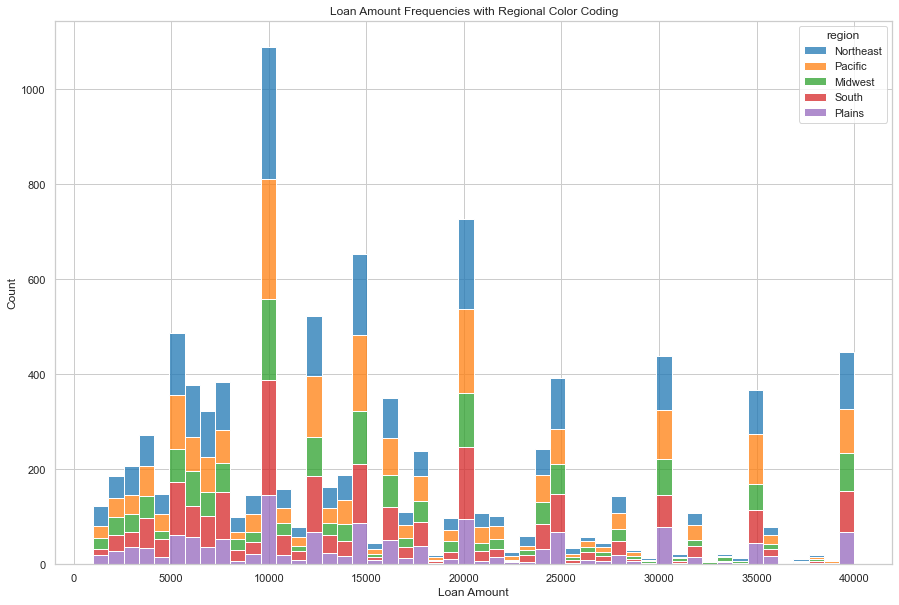

In [172]:
plt.figure(figsize=(15,10))
sns.histplot(data = loans_df, x = 'loan_amount', bins = 50, hue = 'region',  multiple="stack")
plt.xlabel('Loan Amount')
plt.title('Loan Amount Frequencies with Regional Color Coding')
plt.show()